# Heart Desease Project


In [ ]:
!pip install pandas numpy matplotlib scikit-learn seaborn 


## 1. Load datas

In [60]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns

In [61]:
# Les données sont dans le dossier 'data'
df = pd.read_csv(os.path.join('data','heart.csv'))
df_heart = df.copy()

In [62]:
df_heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Décrivons les variables pour une meilleure compréhension du jeu de données : 
- 1. age 
- 2. sex
- 3. chest pain type (4 values) --> TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
- 4. resting blood pressure en mmHg
- 5. serum cholestoral in mg/dl
- 6. fasting blood sugar > 120 mg/dl
- 7. resting electrocardiographic results (values 0,1,2)
- 8. maximum heart rate achieved
- 9. exercise induced angina
- 10. oldpeak = ST depression induced by exercise relative to rest
- 11. the slope of the peak exercise ST segment
- 12. number of major vessels (0-3) colored by flourosopy
- 13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## 2. EDA

In [63]:
from matplotlib import pyplot as plt
# %matplotlib inline

In [64]:
df_heart.shape # On a 1025 lignes (patients) et 14 variables 

(1025, 14)

([<matplotlib.patches.Wedge at 0x1434e54b590>,
 [Text(-0.04550175175760134, 1.0990585018946852, ''),
  Text(0.04550175175760096, -1.0990585018946852, '')],
 [Text(-0.024819137322328003, 0.5994864555789191, '51.32%'),
  Text(0.024819137322327794, -0.5994864555789191, '48.68%')])

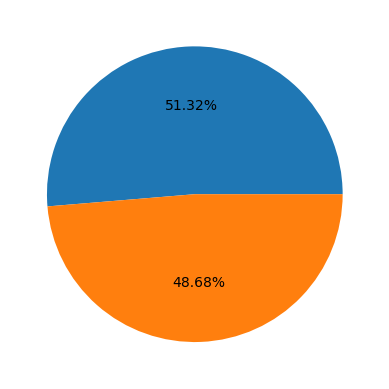

In [65]:
plt.pie(df_heart['target'].value_counts(),autopct='%1.2f%%')
# On voit que les données sont assez équilibrées : 51.32% de non malade et 48.68% de malade 

In [66]:
df_heart.dtypes.value_counts() # On a uniquement des valeurs numériques 13 int et 1 float

int64      13
float64     1
Name: count, dtype: int64

In [67]:
df_heart.describe() #Pour voir les statistiques descriptives de base 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


On peut se demander qui entre les hommes et les femmes ont le plus d'attaques du coeur

C:\Users\fares\AppData\Local\Temp\ipykernel_22856\2616283950.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(labels = ['No heart desease', 'heart desease'])


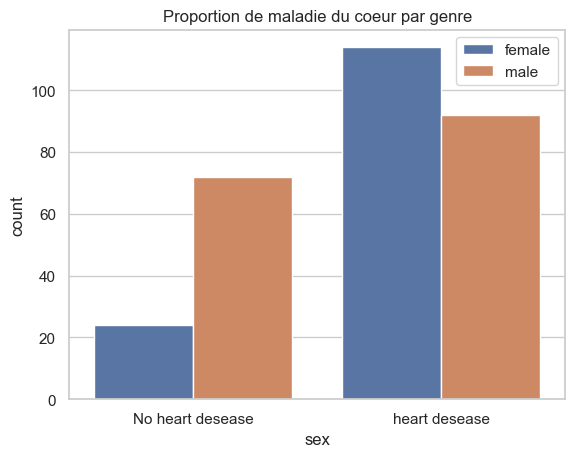

In [167]:
fig = sns.countplot(df_heart, x = 'sex', hue ='target')
fig.set_xticklabels(labels = ['No heart desease', 'heart desease'])
plt.legend(['female','male'])
plt.title("Proportion de maladie du coeur par genre")
plt.show()

On peut maintenant se demander quelles sont les types de douleurs thoraciques pour chaque sex 

Text(0.5, 1.0, 'Type de douleurs par genre')

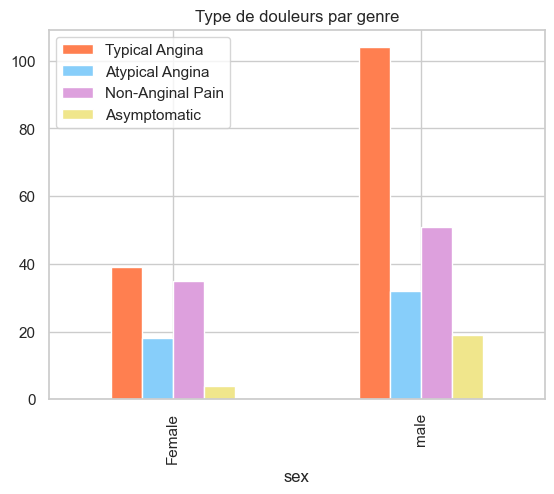

In [168]:
fig = pd.crosstab(df_heart.sex, df_heart.cp).plot(kind = 'bar', color =['coral', 'lightskyblue', 'plum', 'khaki'])
fig.set_xticklabels(labels = ['Female', 'male'])
plt.legend(['Typical Angina', 'Atypical Angina','Non-Anginal Pain','Asymptomatic'])
plt.title('Type de douleurs par genre')


On voit que la proportion par genre reste assez similaire 

on peut se demander quel est le type de douleur qui est le plus à même d'entrainer une maladie du coeur

In [189]:
crosstab = pd.crosstab(df_heart.cp,df_heart.target)
crosstab['% de malade par cp'] = (crosstab[1] / crosstab.sum(axis=1)) *100
crosstab

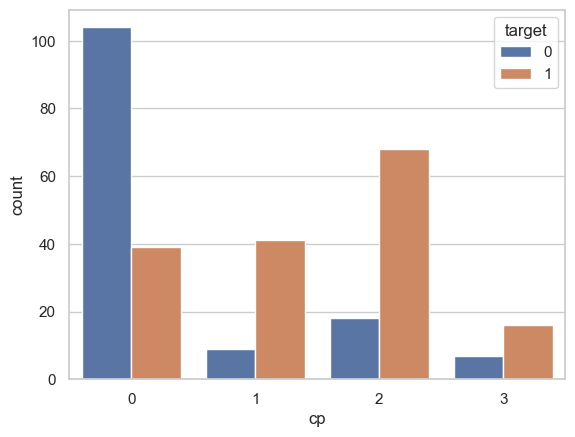

In [191]:
fig = sns.countplot(data=df_heart, x = 'cp', hue = 'target')

In [ ]:
# !pip install ydata-profiling #Pour créer un report 

In [ ]:
# import sys
# !{sys.executable} -m pip install -U ydata-profiling[notebook]
# !pip install jupyter-contrib-nbextensions

In [14]:
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [15]:
from ydata_profiling import ProfileReport # Permet de créer un report consultable soit sur le notebook sur via un fichier html


In [84]:
profile = ProfileReport(df_heart, title = 'Reporting Heart Desease')

In [ ]:
profile.to_notebook_iframe()
profile.to_file("heartdesease.html")

**On peut maintenant s'interesser à voir les relations entre nos variables**

In [ ]:
sns.pairplot(df_heart)

<Axes: >

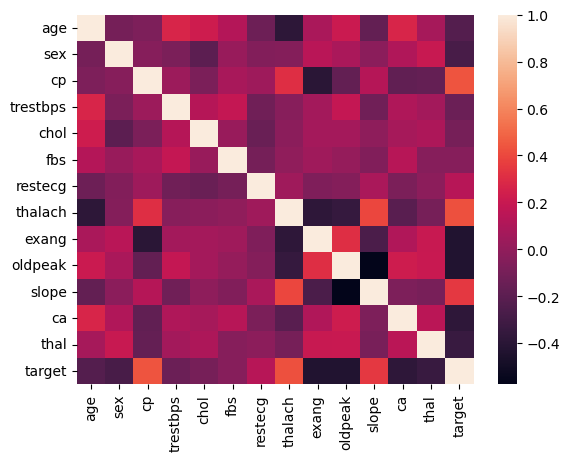

In [68]:
sns.heatmap(df_heart.corr()) # le cp et tal pas mal corélé

In [ ]:
for col in df_heart.columns :  #On peut voir qu'on a un outlier dans la variable cholesterol qui est bcp trop élevé
    plt.figure()
    sns.histplot(df_heart[col])

**Traitement de l'outlyer**

In [43]:
from scipy import stats

In [69]:
df_heart['z_score'] = stats.zscore(df_heart['chol'])
outliers = df_heart[(df_heart['z_score'] > 3.5) | (df_heart['z_score'] < -3.5)]


In [70]:
outliers #On a bien un outlier qui est dupliqué 3 fois

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,z_score
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,6.166694
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,6.166694
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,6.166694


## 3. Data Pre Processing

In [71]:
df_heart.isna().sum() # Aucune valeur manquante

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
z_score     0
dtype: int64

In [72]:
df_heart.drop_duplicates(inplace=True) # Beaucoup de valeurs dupliqués --> on enlève
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,z_score
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,-0.659332
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,-0.833861
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,-1.396233
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,-0.833861
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.930822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,-0.678724
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,-2.036173
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,0.174529
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,0.523587


In [58]:
# Q1 = df['chol'].quantile(0.25)
# Q3 = df['chol'].quantile(0.75)
# IQR = Q3 - Q1

# df['chol'] = df['chol'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)


In [73]:
df_heart['z_score'] = stats.zscore(df_heart['chol'])
outliers = df_heart[(df_heart['z_score'] > 3.5) | (df_heart['z_score'] < -3.5)]


In [88]:
X = df_heart.drop(['target', 'z_score'], axis = 1)
y = df_heart['target']

## 4. Séparer nos données nettoyées en un train et un test split

In [ ]:
# !pip install xgboost

In [157]:
# Importation des modèles importants, des métriques utiles ainsi que de train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

## 5. Nos premiers entrainements 

In [147]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=42)
xgb = XGBClassifier(n_estimators=50,random_state=42)

In [148]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [149]:
class_names = ['No Disease', 'Heart Disease']

In [150]:
def train_model(model, X_train, y_train, X_test, y_test) : 
    # Permet d'afficher les performances de notre modèle
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    print(classification_report(y_test, y_pred))

    sns.set(style='whitegrid')

    # Configurer la figure pour le plot
    plt.figure(figsize=(8, 6))
    
    # Afficher la matrice de confusion
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    
    # Ajouter les étiquettes et le titre
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    
    # Afficher le plot
    plt.show()

    return accuracy, precision

In [ ]:
for clf in clfs.values() :
    accuracy, precision = train_model(clf, X_train, y_train, X_test, y_test)
    print(accuracy, precision)
    

Sans preprocessing et sans changer les hyperparamètres on a 82% de precision avec xgboost ! 

In [ ]:
for model in clfs.values() : 
    pipeline = Pipeline([('scaler', StandardScaler()), ('estimator', model)])
    accuracy, precision = train_model(pipeline, X_train, y_train, X_test, y_test)
    print(accuracy, precision)

Même en normalisant nos données, xgboost reste le modèle le plus performant 
Maintenant pour améliorer notre modèle il serait peut être pas mal de trouver les meilleurs hyperparamètres.

In [161]:
param_grid = {
    'n_estimators': [20, 50, 100, 200, 300],  # Nombre d'arbres
    'max_depth': [3, 5, 7, 9],           # Profondeur maximale des arbres
    'learning_rate': [0.01, 0.1, 0.2], # Taux d'apprentissage
    'subsample': [0.8, 1.0],          # Fraction des échantillons utilisés pour entraîner chaque arbre
    'colsample_bytree': [0.8, 1.0],   # Fraction des caractéristiques utilisées pour entraîner chaque arbre
    'gamma': [0, 0.1, 0.2],           # Régularisation pour réduire le surapprentissage
    'reg_alpha': [0, 0.01, 0.1],      # Régularisation L1 (Lasso)
    'reg_lambda': [1, 1.5, 2]         # Régularisation L2 (Ridge)
}
grid_search = GridSearchCV(xgb,param_grid,scoring='accuracy', cv =5,n_jobs=-1, # Utiliser tous les cœurs disponibles pour accélérer le processus
                           verbose=1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'reg_alpha': 0.01, 'reg_lambda': 2, 'subsample': 0.8}
Best Score: 0.8256802721088435


In [162]:
best_model = grid_search.best_estimator_

# Faire des prédictions avec le modèle optimisé
y_pred = best_model.predict(X_test)

# Évaluer la performance
accuracy = accuracy_score(y_test, y_pred)